# 1. Import Libraries

---



In [1]:
# Prep
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn import linear_model

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# 2. Visualize Data

---



In [2]:
df = pd.read_csv("CAD.csv")

In [3]:
numerical_columns = ["Age", "Weight", "BMI", "BP", "PR", "FBS", "CR"]
categorical_columns = ["Sex", "EX-Smoker", "Typical Chest Pain", "Nonanginal", "VHD", "Cath"]

In [4]:
# Categorical Values unique values
print("=="*30)
print(f'Total Categorical Variables = {len(categorical_columns)}')
print("=="*30)
for cat_col in categorical_columns:
  print(f'* {cat_col} ==> {df[cat_col].unique()} ==> {df[cat_col].nunique()} unique values')

Total Categorical Variables = 6
* Sex ==> ['Male' 'Fmale'] ==> 2 unique values
* EX-Smoker ==> [0 1] ==> 2 unique values
* Typical Chest Pain ==> [0 1] ==> 2 unique values
* Nonanginal ==> ['N' 'Y'] ==> 2 unique values
* VHD ==> ['N' 'mild' 'Severe' 'Moderate'] ==> 4 unique values
* Cath ==> ['Cad' 'Normal'] ==> 2 unique values


In [5]:
# Numerical Values
print("=="*30)
print(f'Total Categorical Variables = {len(numerical_columns)}')
print("=="*30)
for num_col in numerical_columns:
  print(f'* {num_col} ==> {df[num_col].min()} - {df[num_col].max()} ==> {df[num_col].max() - df[num_col].min()} range')

Total Categorical Variables = 7
* Age ==> 30 - 86 ==> 56 range
* Weight ==> 48 - 120 ==> 72 range
* BMI ==> 18.11541271 - 40.90065778 ==> 22.785245070000002 range
* BP ==> 90 - 190 ==> 100 range
* PR ==> 50 - 110 ==> 60 range
* FBS ==> 62 - 400 ==> 338 range
* CR ==> 0.5 - 2.2 ==> 1.7000000000000002 range


/var/folders/t9/tlymbrbn2874888599gmyxdh0000gn/T/ipykernel_57988/2016680548.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


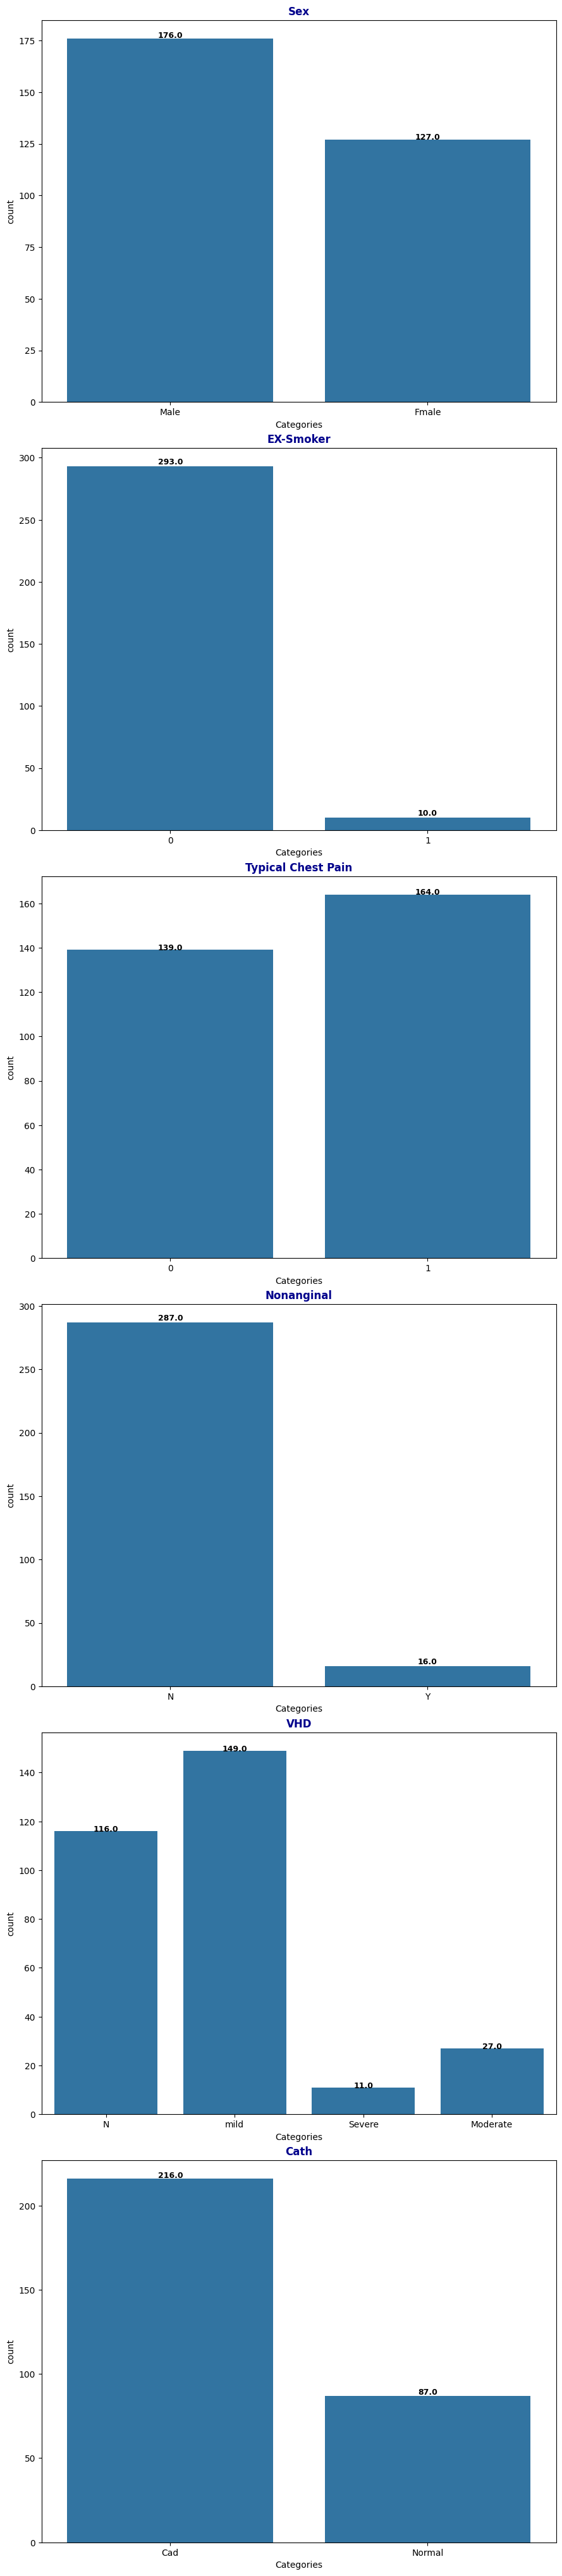

In [6]:
# generate histogram for categorical attributes
fig,ax = plt.subplots(len(categorical_columns),1,figsize = (9,45))
ax = ax.flat

for i,cat_col in enumerate(categorical_columns):
  rects = sns.countplot(df, x = cat_col, ax = ax[i])

  for rect in rects.patches:
      height = rect.get_height()
      ax[i].annotate(f'{height}', (rect.get_x() + rect.get_width() / 2, height-2),
                  xytext=(0, 3),
                  textcoords="offset points",
                  size = 9,
                  ha='center',
                  va='bottom',
                  weight = 'bold')

  ax[i].set_title(f'{cat_col}', fontsize = 12, fontweight = 'bold', color = 'darkblue')
  ax[i].set_xlabel('Categories')


fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

/var/folders/t9/tlymbrbn2874888599gmyxdh0000gn/T/ipykernel_57988/1666164233.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


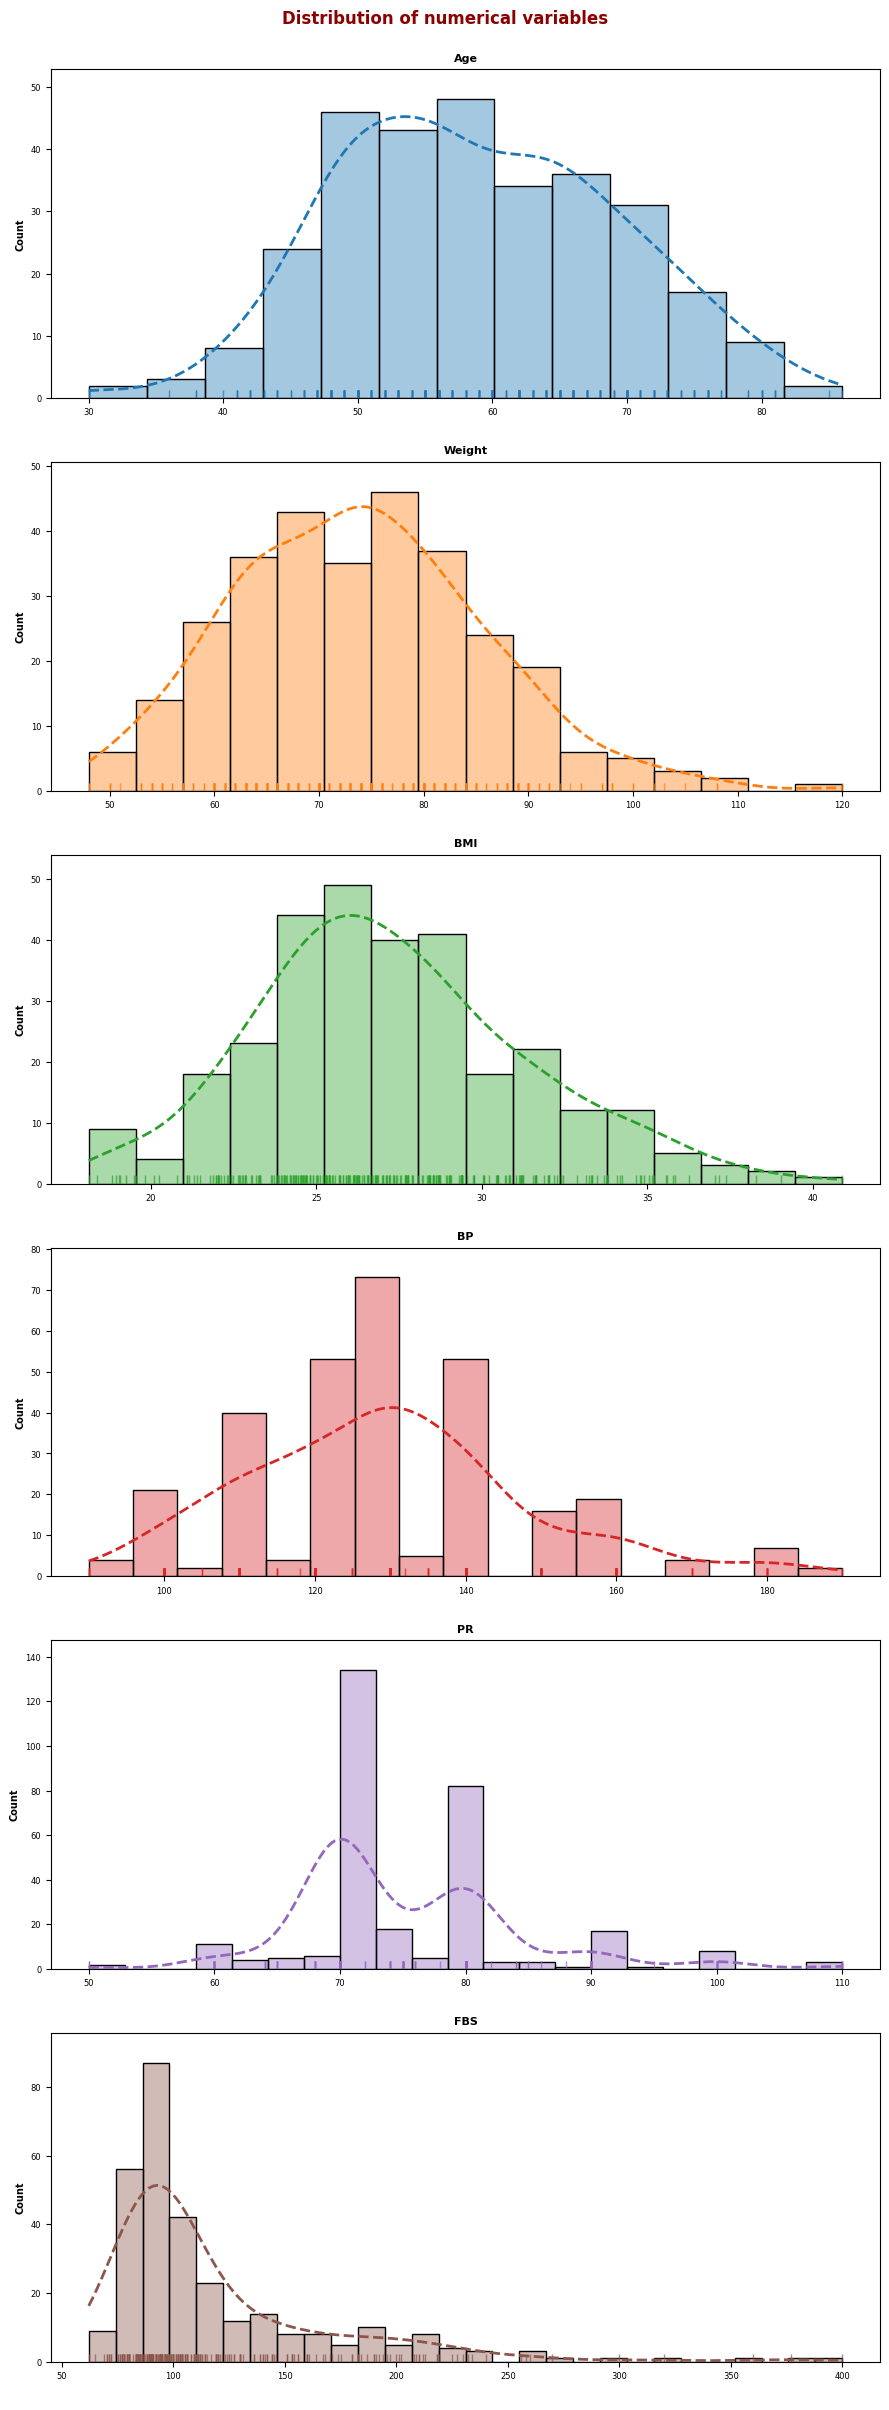

In [7]:
# generate histogram for numerical variables
fig,axes = plt.subplots(nrows = len(numerical_columns), figsize = (9, 30))
axes = axes.flat

color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

for i, num_col in enumerate(numerical_columns):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = color_cycle[i % num_colors]["color"],
               line_kws = {'linewidth': 2,
                           'linestyle':'dashed'},
               alpha = 0.4,
               ax = axes[i])
  sns.rugplot(df,
              x = num_col,
              color = color_cycle[i % num_colors]["color"],
              ax = axes[i], alpha = 0.7)

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
  axes[i].tick_params(labelsize = 6)

fig.delaxes(axes[len(numerical_columns) - 1])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 0.92)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

# 3. Preprocess

---



In [8]:
df.head()
## Dat set size
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns')
df.info()
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:53], df.VHD, test_size=0.2)

The data set has 303 rows and 13 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 303 non-null    int64  
 1   Weight              303 non-null    int64  
 2   Sex                 303 non-null    object 
 3   BMI                 303 non-null    float64
 4   EX-Smoker           303 non-null    int64  
 5   BP                  303 non-null    int64  
 6   PR                  303 non-null    int64  
 7   Typical Chest Pain  303 non-null    int64  
 8   Nonanginal          303 non-null    object 
 9   FBS                 303 non-null    int64  
 10  CR                  303 non-null    float64
 11  VHD                 303 non-null    object 
 12  Cath                303 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 30.9+ KB


# 4. Models


---

